## GPU vs CPU モデル学習速度

CPUマシンとGPUマシンのExperiment完了速度（モデル学習速度）比較。Table Data（数値とカテゴリ型で構成される通常のデータ）と画像Data（1つのカラムが画像情報となっているデータ）で比較

### 比較用マシンスペック

#### CPUマシン
AWS EC2 m5.2xlarge - vCPU:8, メモリ(GiB):32

#### GPUマシン
AWS EC2 p3.2xlarge - GPUメモリ(GB):16, vCPU:8, メモリ(GB):61

### Driverless AI バージョン
1.10.1.3

***

### 実行方法

`(your_env) $ python speed_test.py DAI-URL DAI-User DAI-Password experiment_meta_data/Experiments_Params.csv`  
  
バックグラウンド実行の場合  
`(your_env) $ nohup python speed_test.py DAI-URL DAI-User DAI-Password experiment_meta_data/Experiments_Params.csv &`  

- speed_test上で実行
- speed_test上にresultフォルダを作成しておく（結果が"speedtest_XXXX年XX月XX日XX時XX分XX秒.json"で保存される）

***

In [1]:
import os
#import json

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [13]:
def get_resultdata(result_path) -> pd.DataFrame:
    all_files =  os.listdir(result_path)

    ## json fileのみ取得
    result_files = []
    for f in all_files:
        if os.path.splitext(f)[1] == '.json':
            result_files.append(f)

    print('All files: {}, json files: {}'.format(len(all_files), len(result_files)))

    ## 全てのjson fileを結合し、DataFrameとする
    for i, jf in enumerate(result_files):
        if i == 0:
            df = pd.read_json(os.path.join(result_path, jf), orient='index').transpose()
        else:
            df_tmp = pd.read_json(os.path.join(result_path, jf), orient='index').transpose()
            df = pd.concat([df, df_tmp])

    df = df.reset_index()
    print('Result data shape: {}'.format(df.shape))
    return df

***

## Table Dataでの比較

In [42]:
df_table = get_resultdata('speed_test/result_0314')
df_table

All files: 24, json files: 24
Result data shape: (24, 10)


,index,Meta_Data,Data_Name,Try,Datasize_mb,N_Observation,N_features,Duration_min,Experiment_Size_mb,Acc_Time_Interpret
0,0,experiment_meta_data/Experiments_Params_0308_G...,BostonHousing.csv,3,0.055092,506,13,8.674953,1061.235523,"[7, 2, 8]"
1,0,experiment_meta_data/Experiments_Params_0308_G...,loan_level_1M.csv,3,156.649689,1000000,24,73.813374,1355.719215,"[7, 5, 5]"
2,0,experiment_meta_data/Experiments_Params_0308_G...,BostonHousing.csv,3,0.055092,506,13,8.302996,1062.099873,"[7, 2, 8]"
3,0,experiment_meta_data/Experiments_Params_0308_G...,loan_level_1M.csv,3,156.649689,1000000,24,125.944246,1814.184278,"[7, 5, 5]"
4,0,experiment_meta_data/Experiments_Params_0308_c...,loan_level_500k.csv,3,78.349548,500137,24,69.595436,1448.075129,"[7, 5, 5]"
5,0,experiment_meta_data/Experiments_Params_0308_c...,loan_level_1M.csv,3,156.649689,1000000,24,115.428632,1763.6893,"[7, 5, 5]"
6,0,experiment_meta_data/Experiments_Params_0308_G...,UCI_Credit_Card3.csv,3,3.327423,30000,22,5.18203,1071.340805,"[5, 4, 6]"
7,0,experiment_meta_data/Experiments_Params_0308_G...,BostonHousing.csv,3,0.055092,506,13,8.584157,1063.568437,"[7, 2, 8]"
8,0,experiment_meta_data/Experiments_Params_0308_G...,UCI_Credit_Card3.csv,3,3.327423,30000,22,6.687438,1074.440367,"[5, 4, 6]"
9,0,experiment_meta_data/Experiments_Params_0308_G...,loan_level_500k.csv,3,78.349548,500137,24,33.983545,1156.811635,"[7, 5, 5]"


In [17]:
df_table['sort_index'] = df_table['Data_Name'].map({'BostonHousing.csv':1,
                                                    'UCI_Credit_Card3.csv':2,
                                                    'loan_level_500k.csv':3,
                                                    'loan_level_1M.csv':4})
df_table = df_table.sort_values('sort_index')

***

### 利用データに関して
- データ名
- データサイズ（MB）
- 行数
- 特徴量の数

In [19]:
df_table[['Data_Name','Datasize_mb','N_Observation','N_features']].drop_duplicates()

,Data_Name,Datasize_mb,N_Observation,N_features
0,BostonHousing.csv,0.055092,506,13
6,UCI_Credit_Card3.csv,3.327423,30000,22
4,loan_level_500k.csv,78.349548,500137,24
19,loan_level_1M.csv,156.649689,1000000,24


#### データへのリンク
- [BostonHousing.csv](https://h2oai-jp-public.s3.ap-northeast-1.amazonaws.com/sample_data/boston_house/BostonHousing.csv)
- [UCI_Credit_Card3.csv](https://h2oai-jp-public.s3.ap-northeast-1.amazonaws.com/sample_data/UCI_CreditCard/UCI_Credit_Card3.csv)
- [loan_level_500k.csv](https://s3.amazonaws.com/data.h2o.ai/DAI-Tutorials/loan_level_500k.csv)
- [loan_level_1M.csv](https://s3.amazonaws.com/data.h2o.ai/DAI-Tutorials/loan_level_1M.csv)

***

In [22]:
df_table_cpu = df_table[df_table['Meta_Data']=='experiment_meta_data/Experiments_Params_0308_cpu.csv']   # CPUマシン結果
df_table_cpu = df_table_cpu[['Data_Name', 'Duration_min', 'Experiment_Size_mb']]
df_table_cpu['Duration_min'] = df_table_cpu['Duration_min'].astype(np.float64)
df_table_cpu['Experiment_Size_mb'] = df_table_cpu['Experiment_Size_mb'].astype(np.float64)
#df_cpu = df_cpu.sort_values('Data_Name')

df_table_gpu = df_table[df_table['Meta_Data']=='experiment_meta_data/Experiments_Params_0308_Gpu.csv']  # GPUマシン結果
df_table_gpu = df_table_gpu[['Data_Name', 'Duration_min', 'Experiment_Size_mb']]
df_table_gpu['Duration_min'] = df_table_gpu['Duration_min'].astype(np.float64)
df_table_gpu['Experiment_Size_mb'] = df_table_gpu['Experiment_Size_mb'].astype(np.float64)
#df_gpu = df_gpu.sort_values('Data_Name')

### CPUマシンでの結果

#### 各データでの平均完了時間（4種類のデータで、デフォルト設定で各々3回のモデル作成を実施）

In [25]:
df_table_cpu.groupby('Data_Name').mean().reindex(index=['BostonHousing.csv','UCI_Credit_Card3.csv','loan_level_500k.csv','loan_level_1M.csv'])

,Duration_min,Experiment_Size_mb
Data_Name,,
BostonHousing.csv,4.931919,1065.058941
UCI_Credit_Card3.csv,4.316354,1070.865732
loan_level_500k.csv,55.182633,1300.115312
loan_level_1M.csv,99.216396,1555.837948


Duration_min: Experment完了時間（分）  
Experiment_Size_mb: Experimentのサイズ（MB）

#### 結果の元データのプロット

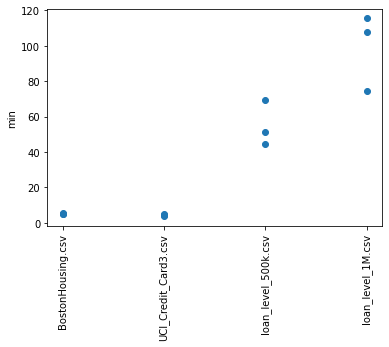

In [28]:
plt.scatter(df_table_cpu['Data_Name'], df_table_cpu['Duration_min'])
plt.ylabel('min')
plt.xticks(rotation=90)
plt.show()

### GPUマシンでの結果

#### 各データでの平均完了時間（4種類のデータで、デフォルト設定で各々3回のモデル作成を実施）

In [26]:
df_table_gpu.groupby('Data_Name').mean().reindex(index=['BostonHousing.csv','UCI_Credit_Card3.csv','loan_level_500k.csv','loan_level_1M.csv'])

,Duration_min,Experiment_Size_mb
Data_Name,,
BostonHousing.csv,8.520702,1062.301277
UCI_Credit_Card3.csv,5.535453,1078.959217
loan_level_500k.csv,58.416344,1257.104580
loan_level_1M.csv,110.304617,1591.140978


#### 結果の元データのプロット

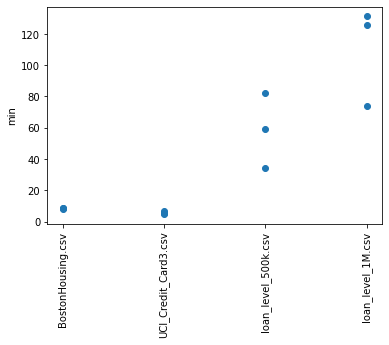

In [27]:
plt.scatter(df_table_gpu['Data_Name'], df_table_gpu['Duration_min'])
plt.ylabel('min')
plt.xticks(rotation=90)
plt.show()

***

## 画像Dataでの比較

In [49]:
df_img = get_resultdata('speed_test/result')
df_img

All files: 13, json files: 12
Result data shape: (12, 10)


,index,Meta_Data,Data_Name,Try,Datasize_mb,N_Observation,N_features,Duration_min,Experiment_Size_mb,Acc_Time_Interpret
0,0,experiment_meta_data/Experiments_Params_0315_c...,car_deals.zip,3,749.219669,34571,4,97.770278,3443.948625,"[6, 3, 7]"
1,0,experiment_meta_data/Experiments_Params_0315_c...,car_deals.zip,3,749.219669,34571,4,88.659758,3369.043343,"[6, 3, 7]"
2,0,experiment_meta_data/Experiments_Params_0315_c...,car_deals.zip,3,749.219669,34571,4,115.199171,3424.4299,"[6, 3, 7]"
3,0,experiment_meta_data/Experiments_Params_0315_G...,histopathology_train.zip,3,535.888886,20000,1,34.631066,2227.520843,"[7, 2, 8]"
4,0,experiment_meta_data/Experiments_Params_0315_c...,histopathology_train.zip,3,535.888886,20000,1,67.442914,2263.252513,"[7, 2, 8]"
5,0,experiment_meta_data/Experiments_Params_0315_c...,histopathology_train.zip,3,535.888886,20000,1,68.296825,2259.084153,"[7, 2, 8]"
6,0,experiment_meta_data/Experiments_Params_0315_c...,histopathology_train.zip,3,535.888886,20000,1,72.527359,2204.875103,"[7, 2, 8]"
7,0,experiment_meta_data/Experiments_Params_0315_G...,car_deals.zip,3,749.219669,34571,4,44.561752,3355.105376,"[6, 3, 7]"
8,0,experiment_meta_data/Experiments_Params_0315_G...,histopathology_train.zip,3,535.888886,20000,1,28.898588,2205.982133,"[7, 2, 8]"
9,0,experiment_meta_data/Experiments_Params_0315_G...,car_deals.zip,3,749.219669,34571,4,48.73603,3392.390763,"[6, 3, 7]"


In [59]:
df_img['sort_index'] = df_img['Data_Name'].map({'histopathology_train.zip':1,
                                                    'car_deals.zip':2})
df_img = df_img.sort_values('sort_index')

***

### 利用データに関して
- データ名
- データサイズ（MB）
- 行数
- 特徴量の数

In [60]:
df_img[['Data_Name','Datasize_mb','N_Observation','N_features']].drop_duplicates()

,Data_Name,Datasize_mb,N_Observation,N_features
3,histopathology_train.zip,535.888886,20000,1
0,car_deals.zip,749.219669,34571,4


car_deals.zipのExperimentは、画像の他に数値/カテゴリカルデータも利用

#### データへのリンク
- [histopathology_train.zip](https://h2o-public-test-data.s3.amazonaws.com/bigdata/server/ImageData/histopathology_train.zip)  
- [car_deals.zip](https://h2o-public-test-data.s3.amazonaws.com/bigdata/server/ImageData/car_deals.zip)

***

In [61]:
df_img['Meta_Data'][8]

'experiment_meta_data/Experiments_Params_0315_Gpu.csv'

In [62]:
df_img_cpu = df_img[df_img['Meta_Data']=='experiment_meta_data/Experiments_Params_0315_cpu.csv']   # CPUマシン結果
df_img_cpu = df_img_cpu[['Data_Name', 'Duration_min', 'Experiment_Size_mb']]
df_img_cpu['Duration_min'] = df_img_cpu['Duration_min'].astype(np.float64)
df_img_cpu['Experiment_Size_mb'] = df_img_cpu['Experiment_Size_mb'].astype(np.float64)

df_img_gpu = df_img[df_img['Meta_Data']=='experiment_meta_data/Experiments_Params_0315_Gpu.csv']  # GPUマシン結果
df_img_gpu = df_img_gpu[['Data_Name', 'Duration_min', 'Experiment_Size_mb']]
df_img_gpu['Duration_min'] = df_img_gpu['Duration_min'].astype(np.float64)
df_img_gpu['Experiment_Size_mb'] = df_img_gpu['Experiment_Size_mb'].astype(np.float64)

### CPUマシンでの結果

#### 各データでの平均完了時間（2種類のデータで、デフォルト設定で各々3回のモデル作成を実施）

In [63]:
df_img_cpu.groupby('Data_Name').mean()

,Duration_min,Experiment_Size_mb
Data_Name,,
car_deals.zip,100.543069,3412.473956
histopathology_train.zip,69.422366,2242.403923


#### 結果の元データのプロット

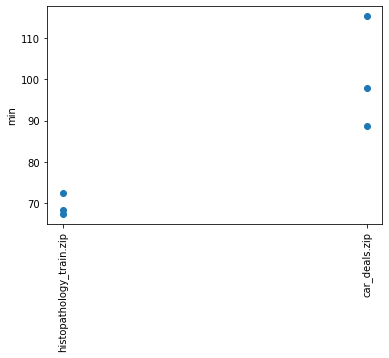

In [64]:
plt.scatter(df_img_cpu['Data_Name'], df_img_cpu['Duration_min'])
plt.ylabel('min')
plt.xticks(rotation=90)
plt.show()

### GPUマシンでの結果

#### 各データでの平均完了時間（2種類のデータで、デフォルト設定で各々3回のモデル作成を実施）

In [65]:
df_img_gpu.groupby('Data_Name').mean()

,Duration_min,Experiment_Size_mb
Data_Name,,
car_deals.zip,44.650165,3366.747117
histopathology_train.zip,33.227632,2214.051190


#### 結果の元データのプロット

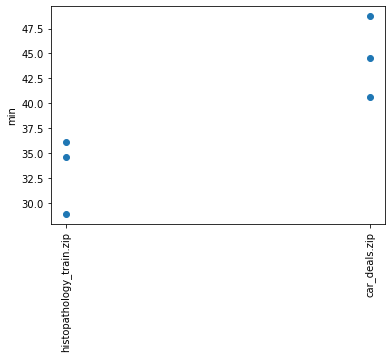

In [66]:
plt.scatter(df_img_gpu['Data_Name'], df_img_gpu['Duration_min'])
plt.ylabel('min')
plt.xticks(rotation=90)
plt.show()